<a href="https://colab.research.google.com/github/Kd-26/Traffic-Flow-Innovation-Project-/blob/main/Indicator_Direction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp /content/gdrive/MyDrive/Indicator.zip/path/to/data.zip /content

Mounted at /content/gdrive
cp: cannot stat '/content/gdrive/MyDrive/Indicator.zip/path/to/data.zip': No such file or directory


In [ ]:
!unzip -q /content/Indicator.zip -d /content/Indicator_data

Spiltting the Data for Training and Validation

In [ ]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py

# TO DO: Improve robustness of train_val_split.py script so it can handle nested data folders, etc
!python train_val_split.py --datapath="/content/Indicator_data" --train_pct=0.9

--2025-03-16 03:47:24--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-03-16 03:47:24 (66.3 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.
Number of image files: 1067
Number of annotation files: 1067
Images moving to train: 960
Images moving to validation: 107


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 20.0 MB/s eta 0:00:00


In [ ]:
import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/Indicator_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 2
names:
- Left Indicator
- Right Indicator


**Training the Model**

In [ ]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=70 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 106MB/s] 
Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cpu CPU (AMD EPYC 7B13)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=

Testing The Model

In [ ]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/validation/images save=True

Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cpu CPU (AMD EPYC 7B13)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

image 1/107 /content/data/validation/images/0286890a-Screenshot_2025-03-13_at_8.08.24PM.png: 640x640 1 Left Indicator, 90.4ms
image 2/107 /content/data/validation/images/029211d0-Screenshot_2025-03-14_at_12.14.02AM.png: 512x640 1 Left Indicator, 73.4ms
image 3/107 /content/data/validation/images/0556f547-Screenshot_2025-03-13_at_8.08.24PM.png: 640x640 1 Left Indicator, 1 Right Indicator, 87.7ms
image 4/107 /content/data/validation/images/07ec394b-Screenshot_2025-03-14_at_12.46.04AM.png: 320x640 1 Right Indicator, 72.3ms
image 5/107 /content/data/validation/images/1213bb50-Screenshot_2025-03-13_at_5.50.53PM.png: 576x640 1 Left Indicator, 1 Right Indicator, 103.7ms
image 6/107 /content/data/validation/images/166ee747-Screenshot_2025-03-14_at_7.41.04PM.png: 512x640 1 Left Indicator, 1 Right Indicator, 94.7ms
image 7/107 /content/data/

Displaying the results

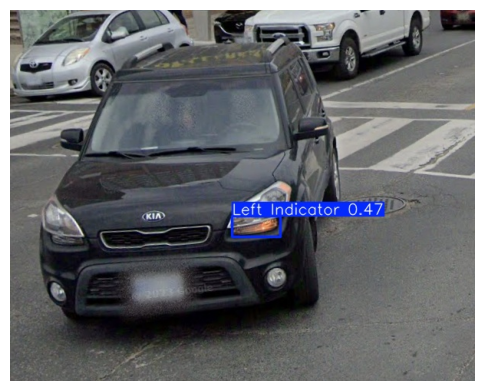

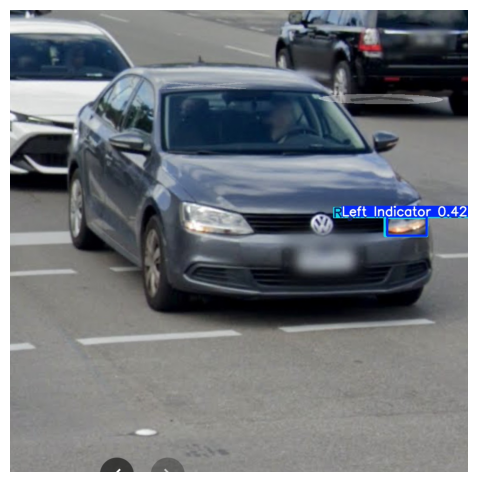

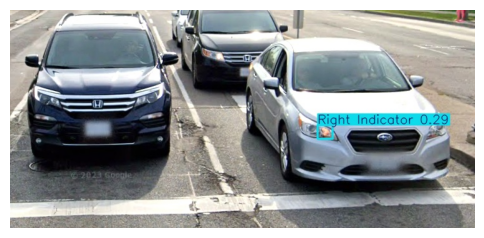

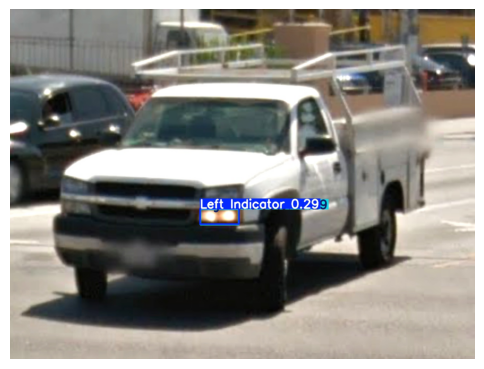

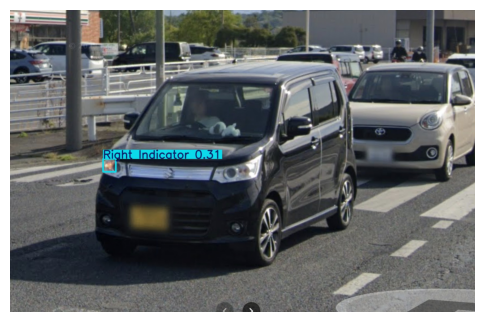

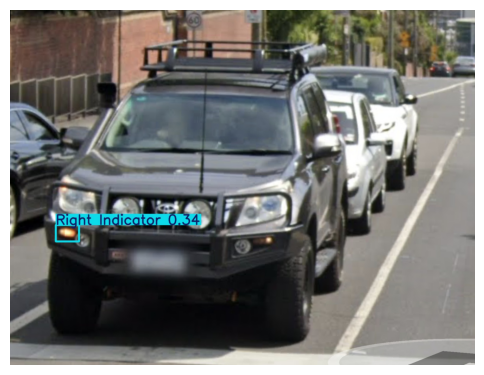

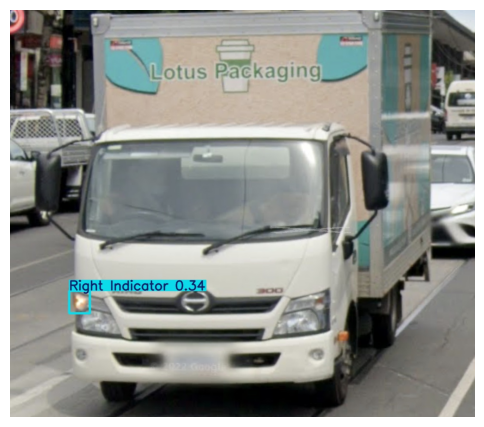

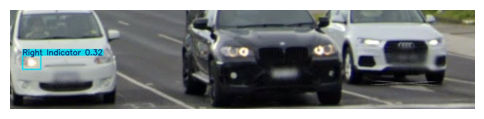

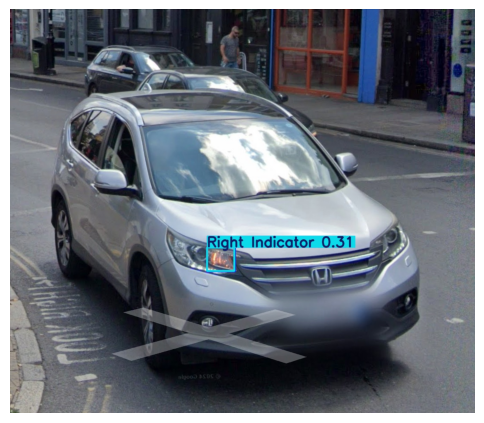

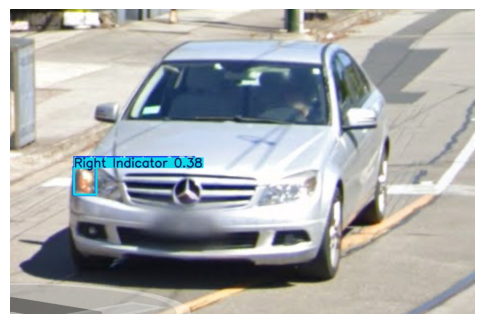

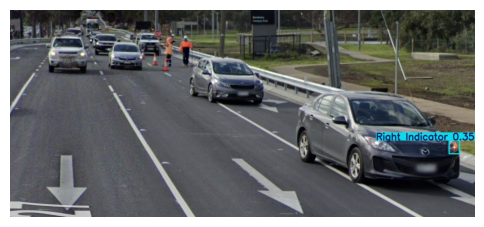

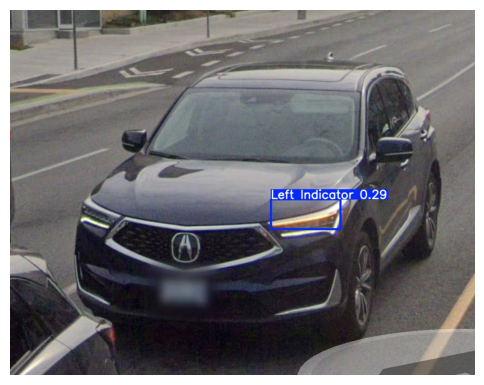

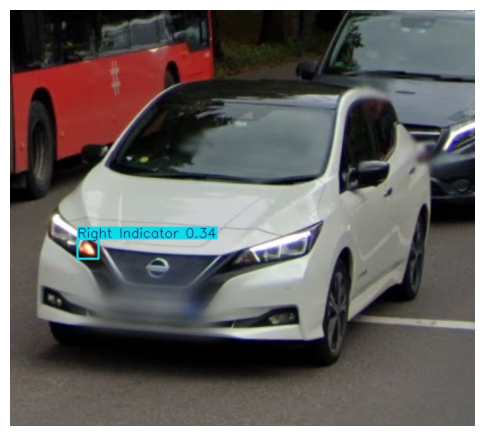

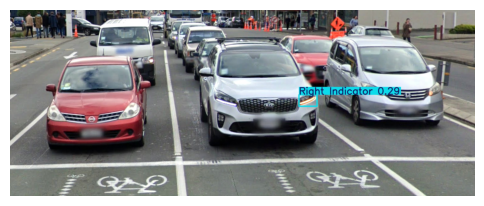

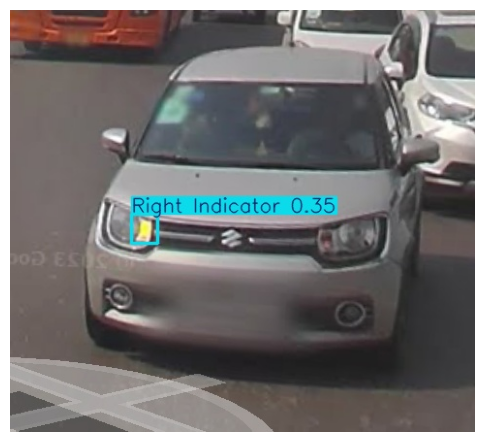

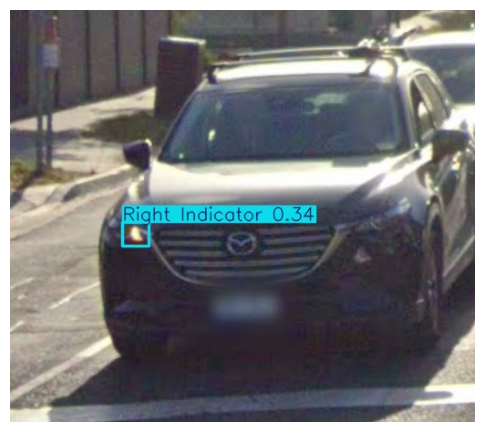

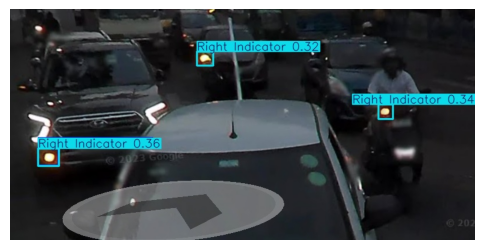

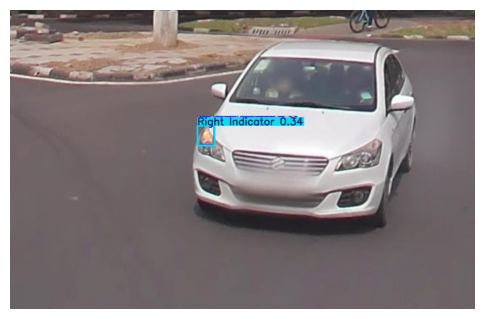

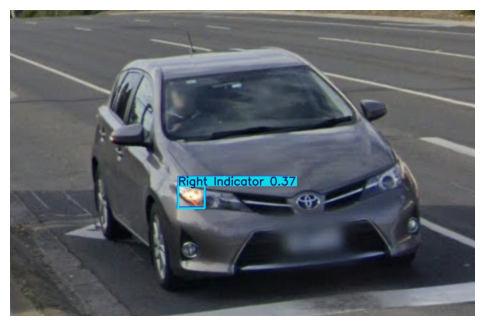

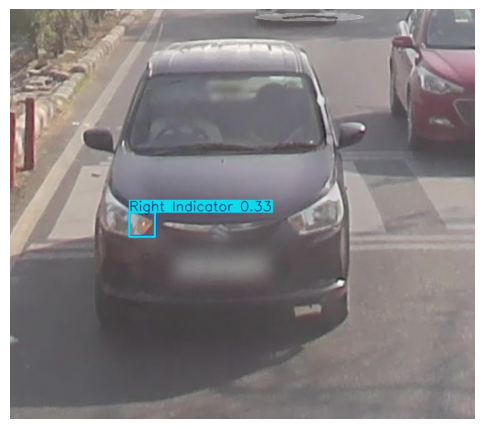

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image_directory = '/content/runs/detect/predict'


image_files = [f for f in os.listdir(image_directory) if f.endswith(( 'jpg'))]

image_files.sort()


image_files = image_files[:20]


for image_file in image_files:
    img_path = os.path.join(image_directory, image_file)
    img = mpimg.imread(img_path)

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/val_batch0_pred.jpg (deflated 11%)
  adding: train/args.yaml (deflated 53%)
  adding: train/val_batch2_pred.jpg (deflated 9%)
  adding: train/train_batch3602.jpg (deflated 14%)
  adding: train/val_batch1_pred.jpg (deflated 8%)
  adding: train/val_batch2_labels.jpg (deflated 8%)
  adding: train/train_batch1.jpg (deflated 5%)
  adding: train/train_batch3601.jpg (deflated 7%)
  adding: train/train_batch2.jpg (deflated 2%)
  adding: train/P_curve.png (deflated 13%)
  adding: train/confusion_matrix_normalized.png (deflated 30%)
  adding: train/PR_curve.png (deflated 21%)
  adding: train/labels_correlogram.jpg (deflated 46%)
  adding: train/val_batch0_labels.jpg (deflated 10%)
  adding: train/confusion_matrix.png (deflated 32%)
  adding: train/val_batch1_labels.jpg (deflated 8%)
  adding: train/results.csv (deflated 61%)
  adding: train/train_batch0.jpg (deflated 5%)
  adding: train/labels.jpg 